##### Models :
       :AR(3)-GARCH(1,1) under normal distribution
       :AR(3)-EGARCH(1,1) student-t distribution
       :AR(3)-EWMA under normal and student-t distributions
       :AR(3)-EGARCH under student-t distribution
       :AR(3)-AVGARCH under normal and student-t distributions
       :AR(3)-TARCH under normal and student-t distribution

#### Four companies listed on the JSE     
                                      : Netcare Group Limited
                                      : Sanlam Limited
                                      : Nedbank Group
                                      : Sanlam Limited

## Netcare limited

In [2]:
#importing the modules in python
import matplotlib.pylab as plt
from arch import arch_model
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from arch.univariate import SkewStudent
%matplotlib inline
import warnings

#load the data
filename = 'ntc.csv'
netcareTS = pd.read_csv(filename).dropna()
netcareTS.head(5)


,Date,Open,High,Low,Close,Volume
0,13/01/02,1985,1990,1963,1975.0,514952
1,13/01/03,1974,1976,1960,1970.0,584990
2,13/01/04,1969,2011,1954,2000.0,3130465
3,13/01/07,2005,2010,1977,1990.0,1483949
4,13/01/08,2000,2000,1986,2000.0,1269313


In [3]:
len(netcareTS)

1177

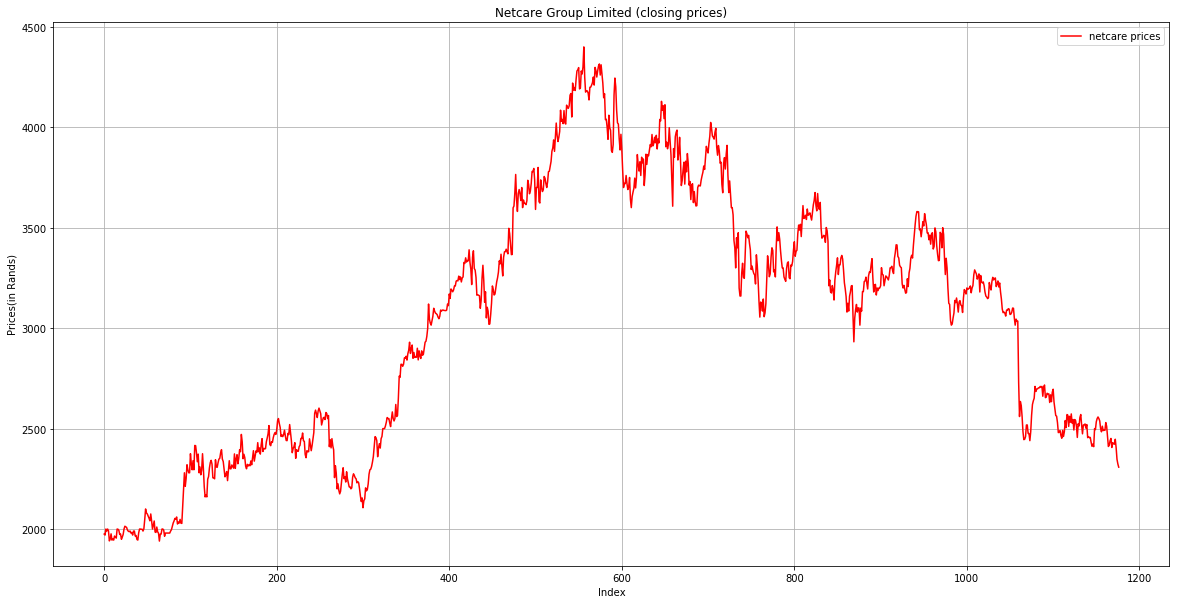

In [4]:
plt.figure(figsize=(20,10))
plt.plot(netcareTS["Close"],label="netcare prices",color="red")
plt.grid(True)
plt.title("Netcare Group Limited (closing prices)",color="black")
plt.xlabel("Index")
plt.ylabel("Prices(in Rands)")
plt.legend(loc=1)

$\textbf{Log-returns}$

To analyze the stock price, we usually calculate the logged return of
the stock to make the data stationary

$r_{t}=log\Big(\frac{p_{t}}{p_{t-1}}\Big)$, where $p_{t}$ is the stock price at time $t$

In [5]:
#The log-returns
returns=np.log((netcareTS["Close"])/(netcareTS["Close"].shift()))
returns.head(5)
returns=returns.dropna()

The following plot shows the daily logged return of Netcare Group Limited


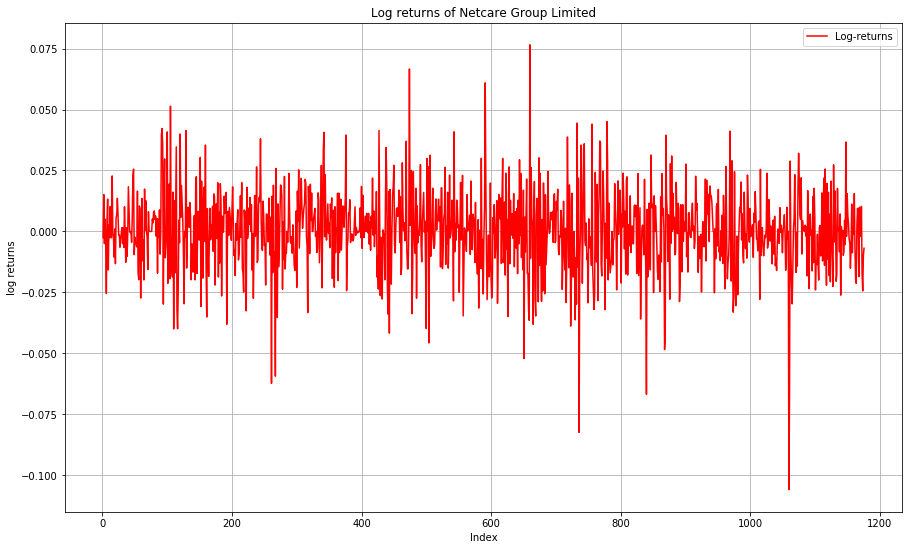

In [6]:
print("The following plot shows the daily logged return of Netcare Group Limited")
plt.figure(figsize=(15,9))
plt.plot(returns,label="Log-returns",color="red")
plt.grid(True)
plt.title("Log returns of Netcare Group Limited",color="black")
plt.xlabel("Index")
plt.ylabel("log returns")
plt.legend(loc=0)
plt.show()

$\textbf{Test for stationarity of returns}$: Augmented dickey fuller, Philips perron tests

In [7]:
#stationarity test for the returns series
#The number of lags can be directly set using lags.
#Changing the number of lags makes no difference to the conclusion
#The ADF assumes residuals are white noise, and that the number of lags is sufficient, 
#to pick up any dependence  in the data.

from arch.unitroot import ADF
adf = ADF(returns)
adf.lags = 15
print(adf.summary().as_text())
print('The ADF test statistic value is less than the critical region and p-value is also less than 0.05 significance level.So we  reject the null hypothesis of non-stationarity of the series and conclude that the returns series is stationary')


/home/vhahangwele/.local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


   Augmented Dickey-Fuller Results   
Test Statistic                 -9.050
P-value                         0.000
Lags                               15
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
The ADF test statistic value is less than the critical region and p-value is also less than 0.05 significance level.So we  reject the null hypothesis of non-stationarity of the series and conclude that the returns series is stationary


In [8]:
#Alternative test for stationarity the Philips perron test
from arch.unitroot import PhillipsPerron
pp = PhillipsPerron(returns)
pp.lags=23
print(pp.summary().as_text())
print("The test statistic is less than critical values for all significance levels, so we reject the null hypothesis of non-stationarity (unit root)")

     Phillips-Perron Test (Z-tau)    
Test Statistic                -36.474
P-value                         0.000
Lags                               23
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
The test statistic is less than critical values for all significance levels, so we reject the null hypothesis of non-stationarity (unit root)


$\textbf{Split the data into multiple training and testing sets}$

### split1: Train 500  Test:200
###  split2: Train 700  Test:200

# MODEL AR(3)-GARCH(1,1)-normal distribution

AR(3)-GARCH(1,1):  $x_{t}=\alpha_{1}x_{t-1}+\alpha_{2}x_{t-2}+\alpha_{3}x_{t-3}+\epsilon_{t},$
where  $\epsilon_{t}=\sigma_{t} z_{t}$ and $z_{t}$ follows a normal  distribution. The volatility ($\sigma_{t}$) is given by  GARCH(1,1):$\sigma^2_t   =  \omega + \alpha \epsilon_{t-1}^2 + \beta \sigma_{t-1}^2$


##### split1: Train 500  Test:200

Summary results of the model:
We can see that all the estimated coefficient lies within the 95% confidence interval. So we are 95% confidence that the true parameter lies within computed intervals. We can aslo see that the standard errors are relatively very small. This shows that our estimates are close to the true values.
                           AR - GARCH Model Results                           
Dep. Variable:                  Close   R-squared:                       0.010
Mean Model:                        AR   Adj. R-squared:                  0.004
Vol Model:                      GARCH   Log-Likelihood:                1379.32
Distribution:                  Normal   AIC:                          -2744.65
Method:            Maximum Likelihood   BIC:                          -2715.19
                                        No. Observations:                  497
Date:                Sat, Jul 14 2018   Df Residuals:                      490
Time:                        09:45:34   Df

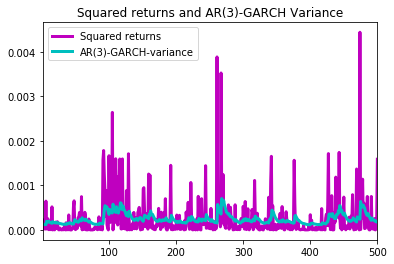

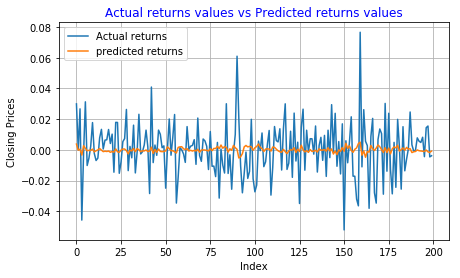

Test data:
([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1], 200)
Predicted data:
([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 

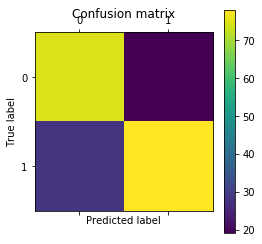

In [9]:
netcareTrain1=returns[0:500]
netcareTest1=returns[500:700]
import warnings 
from arch.univariate import ARX
from  arch.univariate  import  GARCH
import numpy as np
ar = ARX(netcareTrain1, lags = 3)
#specify the volatility of the model
ar.volatility=GARCH()
warnings.filterwarnings("ignore")
result = ar.fit(update_freq=5, disp='off')
warnings.filterwarnings("ignore")
print("Summary results of the model:")
print("We can see that all the estimated coefficient lies within the 95% confidence interval. So we are 95% confidence that the true parameter lies within computed intervals. We can aslo see that the standard errors are relatively very small. This shows that our estimates are close to the true values.")
print((result.summary()))
#We plot the returns against estimated volatility
df = pd.concat([(netcareTrain1)**2,(result.conditional_volatility)**2],1)
df.columns = [ 'Squared returns','AR(3)-GARCH-variance']
df.title="Returns vs volatility"
df.plot(title="Squared returns and AR(3)-GARCH Variance",color=["m","c"],linewidth=3)
#All that is required from a trained ARIMA model is the coefficients.
#Convert training and testing data into an array
netcareTrain1=np.array(netcareTrain1)   
netcareTest1=np.array(netcareTest1)
#Make predictions from retrieved estimated coefficients
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
            yhat +=coef[i-1] * history[-i]
    return yhat
history=[x for x in netcareTrain1]
predictions = list()
for i in range(len(netcareTest1)):
    ar_coef=result.params['Close[1]'],result.params['Close[2]'],result.params['Close[3]']            
    yhat=predict(ar_coef,history)
    #store forecast and observations
    predictions.append(yhat)
    obs=netcareTest1[i]
    history.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(netcareTest1,label="Actual returns")
plt.plot(predictions,label="predicted returns")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()
#direction of stock prices
#convert my predictions to binary 0 or 1
print("Test data:")
test_predicted=predictions
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
AR_GARCH_nd500=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(netcareTest1)):
    if netcareTest1[t-1]>=netcareTest1[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))

len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
            count=count+1
    print ("The number of correct direction predictions is:",count,"out of:",len(x),"data points")
counter(binary_test,binary_predicted_test)
print("From a sample of",len(binary_test),"data points")
#accuracy decsribes: overall, how often the classifier is correct
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy for testing data:")
def Confusion_matrix(n):
    print(accuracy_score(binary_test[0:n],binary_predicted_test[0:n])*100)
    confusion=confusion_matrix(binary_test[0:n],binary_predicted_test[0:n])
    print(confusion) 
    #show confusion matrix
    plt.matshow(confusion)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
Confusion_matrix(len(binary_test))


##### split2: Train 700  Test:200

/home/vhahangwele/.local/lib/python2.7/site-packages/arch/univariate/base.py:517: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


Summary results of the model:
We can see that all the estimated coefficient lies within the 95% confidence interval. So we are 95% confidence that the true parameter lies within computed intervals. We can aslo see that the standard errors are relatively very small. This shows that our estimates are close to the true values.
                           AR - GARCH Model Results                           
Dep. Variable:                  Close   R-squared:                       0.022
Mean Model:                        AR   Adj. R-squared:                  0.018
Vol Model:                      GARCH   Log-Likelihood:                1912.06
Distribution:                  Normal   AIC:                          -3810.12
Method:            Maximum Likelihood   BIC:                          -3778.29
                                        No. Observations:                  697
Date:                Sat, Jul 14 2018   Df Residuals:                      690
Time:                        09:45:42   Df

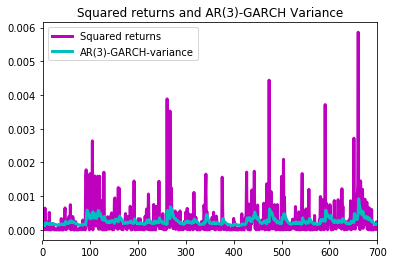

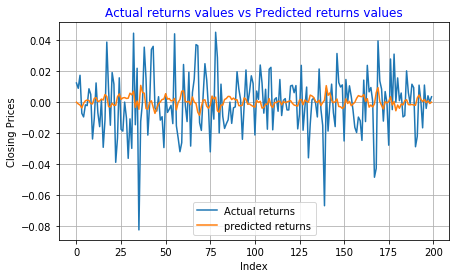

Test data:
([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1], 200)
Predicted data:
([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 

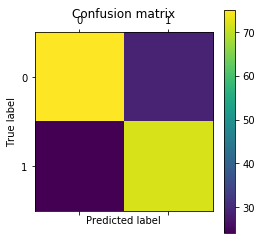

In [10]:
netcareTrain1=returns[0:700]
netcareTest1=returns[700:900]
import warnings 
from arch.univariate import ARX
from  arch.univariate  import  GARCH
import numpy as np
ar = ARX(netcareTrain1, lags = 3)
#specify the volatility of the model
ar.volatility=GARCH()
warnings.filterwarnings("ignore")
result = ar.fit(update_freq=5, disp='off')
warnings.filterwarnings("ignore")
print("Summary results of the model:")
print("We can see that all the estimated coefficient lies within the 95% confidence interval. So we are 95% confidence that the true parameter lies within computed intervals. We can aslo see that the standard errors are relatively very small. This shows that our estimates are close to the true values.")
print((result.summary()))
df = pd.concat([(netcareTrain1)**2,(result.conditional_volatility)**2],1)
df.columns = [ 'Squared returns','AR(3)-GARCH-variance']
df.title="Returns vs volatility"
df.plot(title="Squared returns and AR(3)-GARCH Variance",color=["m","c"],linewidth=3)
#All that is required from a trained ARIMA model is the coefficients.
#Convert training and testing data into an array
netcareTrain1=np.array(netcareTrain1)   
netcareTest1=np.array(netcareTest1)
#Make predictions from retrieved estimated coefficients
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
            yhat +=coef[i-1] * history[-i]
    return yhat
history=[x for x in netcareTrain1]
predictions = list()
for i in range(len(netcareTest1)):
    ar_coef=result.params['Close[1]'],result.params['Close[2]'],result.params['Close[3]']            
    yhat=predict(ar_coef,history)
    #store forecast and observations
    predictions.append(yhat)
    obs=netcareTest1[i]
    history.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(netcareTest1,label="Actual returns")
plt.plot(predictions,label="predicted returns")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()
#direction of stock prices
#convert my predictions to binary 0 or 1
print("Test data:")
test_predicted=predictions
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
AR_GARCH_nd700=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(netcareTest1)):
    if netcareTest1[t-1]>=netcareTest1[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))

len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
            count=count+1
    print ("The number of correct direction predictions is:",count,"out of:",len(x),"data points")
counter(binary_test,binary_predicted_test)
print("From a sample of",len(binary_test),"data points")
Confusion_matrix(len(binary_test))

# AR(3)-AVGARCH-normal distribution
power=1.0 o=0

##### split1: Train 500  Test:200

In [11]:
from arch.univariate import HARCH
netcareTrain1=returns[0:500]
netcareTest1=returns[500:700]
AR=ARX(netcareTrain1,lags=3)
AR.volatility=GARCH(1,0,1,power=1)
AR_AVGARCH=AR.fit(update_freq=0,disp='off')
print(AR_AVGARCH.summary())

                          AR - AVGARCH Model Results                          
Dep. Variable:                  Close   R-squared:                       0.010
Mean Model:                        AR   Adj. R-squared:                  0.004
Vol Model:                    AVGARCH   Log-Likelihood:                1381.47
Distribution:                  Normal   AIC:                          -2748.95
Method:            Maximum Likelihood   BIC:                          -2719.49
                                        No. Observations:                  497
Date:                Sat, Jul 14 2018   Df Residuals:                      490
Time:                        09:45:50   Df Model:                            7
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const      1.7182e-03  8.531e-04      2.014  4.400e-02 [4.

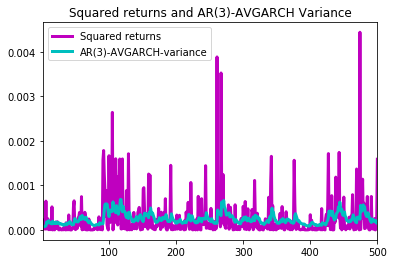

In [12]:
#We plot the returns against estimated volatility
import pandas as pd
df = pd.concat([(netcareTrain1)**2,(AR_AVGARCH.conditional_volatility)**2],1)
df.columns = [ 'Squared returns','AR(3)-AVGARCH-variance']
df.title="Returns vs volatility"
df.plot(title="Squared returns and AR(3)-AVGARCH Variance",color=["m","c"],linewidth=3)

In [13]:
# partion the data into training and testing data
netcareTrain1=np.array(netcareTrain1)
netcareTest1=np.array(netcareTest1)
#make predictions from retrieved estimated coefficients
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
            yhat += coef[i-1] * history[-i]
    return yhat
history=[x for x in netcareTrain1]
predictions = list()
for i in range(len(netcareTest1)):
    ar_coef= AR_AVGARCH.params["Close[1]"],AR_AVGARCH.params["Close[2]"],AR_AVGARCH.params["Close[3]"]#extract the generated parameters
    yhat=predict(ar_coef,history)
    predictions.append(yhat)
    obs=netcareTest1[i]
    history.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))

    

>predicted=0.003, expected=0.030
>predicted=-0.000, expected=0.000
>predicted=0.001, expected=0.027
>predicted=-0.003, expected=-0.046
>predicted=0.002, expected=-0.002
>predicted=0.001, expected=0.031
>predicted=-0.000, expected=-0.010
>predicted=-0.000, expected=-0.005
>predicted=-0.001, expected=0.002
>predicted=0.000, expected=0.018
>predicted=-0.001, expected=-0.002
>predicted=-0.001, expected=-0.007
>predicted=-0.000, expected=-0.005
>predicted=0.001, expected=0.008
>predicted=-0.000, expected=0.013
>predicted=-0.001, expected=0.001
>predicted=-0.001, expected=0.006
>predicted=-0.001, expected=0.007
>predicted=-0.001, expected=0.013
>predicted=-0.001, expected=0.004
>predicted=-0.001, expected=0.010
>predicted=-0.001, expected=-0.015
>predicted=0.001, expected=0.018
>predicted=-0.001, expected=0.018
>predicted=-0.001, expected=-0.015
>predicted=-0.000, expected=-0.008
>predicted=0.000, expected=0.005
>predicted=0.001, expected=0.007
>predicted=-0.000, expected=0.026
>predicted=-0

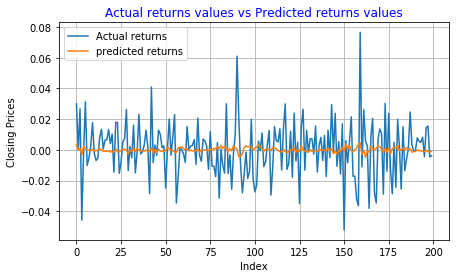

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(netcareTest1,label="Actual returns")
plt.plot(predictions,label="predicted returns")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()

In [15]:
#direction of stock prices
#convert my predictions to binary 0 or 1
print("Test data:")
test_predicted=predictions
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
AR_AVGARCH_nd500=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(netcareTest1)):
    if netcareTest1[t-1]>=netcareTest1[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
             count=count+1
    print ("The number of correct direction predictions is:",count,"out of:",len(x),"data points")
counter(binary_test,binary_predicted_test)
print("From a sample of",len(binary_test),"data points")

Test data:
([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1], 200)
Predicted data:
([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 

74.5
[[73 21]
 [30 76]]


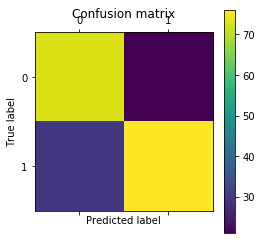

In [16]:
Confusion_matrix(len(binary_test))

###### split: Train 700  Test:200

                          AR - AVGARCH Model Results                          
Dep. Variable:                  Close   R-squared:                       0.022
Mean Model:                        AR   Adj. R-squared:                  0.018
Vol Model:                    AVGARCH   Log-Likelihood:                1915.61
Distribution:                  Normal   AIC:                          -3817.22
Method:            Maximum Likelihood   BIC:                          -3785.39
                                        No. Observations:                  697
Date:                Sat, Jul 14 2018   Df Residuals:                      690
Time:                        09:46:03   Df Model:                            7
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const      1.6598e-03  4.729e-04      3.510  4.482e-04 [7.

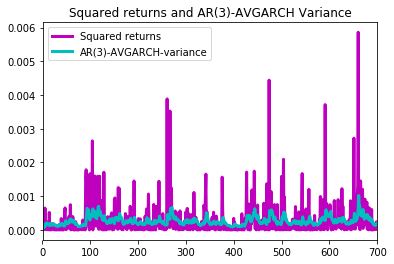

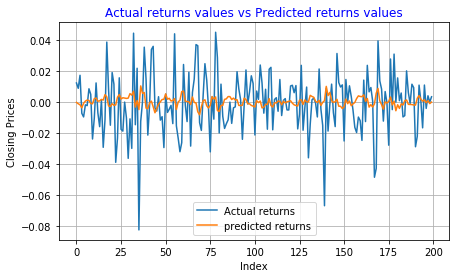

Test data:
([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1], 200)
Predicted data:
([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 

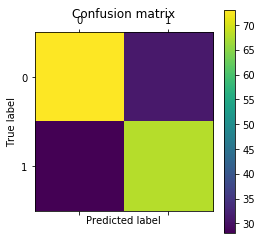

In [17]:
from arch.univariate import HARCH
netcareTrain1=returns[0:700]
netcareTest1=returns[700:900]
AR=ARX(netcareTrain1,lags=3)
AR.volatility=GARCH(1,0,1,power=1)
AR_AVGARCH=AR.fit(update_freq=0,disp='off')
print(AR_AVGARCH.summary())
#We plot the returns against estimated volatility
import pandas as pd
df = pd.concat([(netcareTrain1)**2,(AR_AVGARCH.conditional_volatility)**2],1)
df.columns = [ 'Squared returns','AR(3)-AVGARCH-variance']
df.title="Returns vs volatility"
df.plot(title="Squared returns and AR(3)-AVGARCH Variance",color=["m","c"],linewidth=3)
# partion the data into training and testing data
netcareTrain1=np.array(netcareTrain1)
netcareTest1=np.array(netcareTest1)
#make predictions from retrieved estimated coefficients
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
            yhat += coef[i-1] * history[-i]
    return yhat
history=[x for x in netcareTrain1]
predictions = list()
for i in range(len(netcareTest1)):
    ar_coef= AR_AVGARCH.params["Close[1]"],AR_AVGARCH.params["Close[2]"],AR_AVGARCH.params["Close[3]"]#extract the generated parameters
    yhat=predict(ar_coef,history)
    predictions.append(yhat)
    obs=netcareTest1[i]
    history.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(netcareTest1,label="Actual returns")
plt.plot(predictions,label="predicted returns")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()
#direction of stock prices
#convert my predictions to binary 0 or 1
print("Test data:")
test_predicted=predictions
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
AR_AVGARCH_nd700=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(netcareTest1)):
    if netcareTest1[t-1]>=netcareTest1[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
             count=count+1
    print ("The number of correct direction predictions is:",count,"out of:",len(x),"data points")
counter(binary_test,binary_predicted_test)
print("From a sample of",len(binary_test),"data points")
Confusion_matrix(len(binary_test))

# MODEL: AR(3)-AVGARCH-Student-t distribution

##### split: Train 500  Test:200

                             AR - AVGARCH Model Results                             
Dep. Variable:                        Close   R-squared:                       0.010
Mean Model:                              AR   Adj. R-squared:                  0.004
Vol Model:                          AVGARCH   Log-Likelihood:                1397.81
Distribution:      Standardized Student's t   AIC:                          -2779.63
Method:                  Maximum Likelihood   BIC:                          -2745.96
                                              No. Observations:                  497
Date:                      Sat, Jul 14 2018   Df Residuals:                      489
Time:                              09:47:07   Df Model:                            8
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Cons

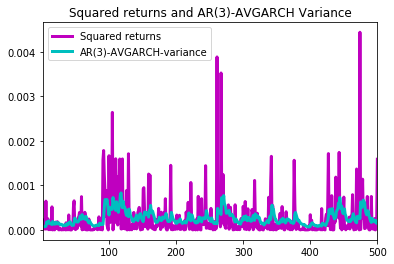

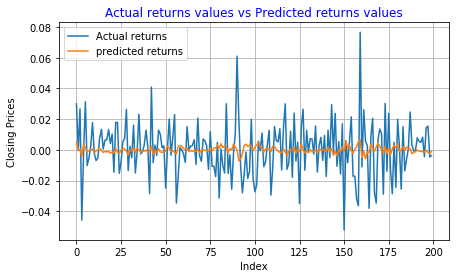

Test data:
([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1], 200)
Predicted data:
([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 

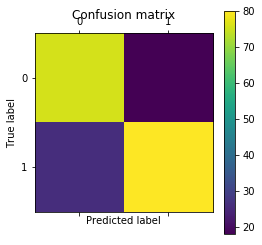

In [18]:
from arch.univariate import HARCH
from arch.univariate import StudentsT
netcareTrain1=returns[0:500]
netcareTest1=returns[500:700]
AR=ARX(netcareTrain1,lags=3)
AR.volatility=GARCH(1,0,1,power=1)
AR.distribution=StudentsT()
AR_AVGARCH=AR.fit(update_freq=0,disp='off')
print(AR_AVGARCH.summary())
#We plot the returns against estimated volatility
import pandas as pd
df = pd.concat([(netcareTrain1)**2,(AR_AVGARCH.conditional_volatility)**2],1)
df.columns = [ 'Squared returns','AR(3)-AVGARCH-variance']
df.title="Returns vs volatility"
df.plot(title="Squared returns and AR(3)-AVGARCH Variance",color=["m","c"],linewidth=3)
# partion the data into training and testing data
netcareTrain1=np.array(netcareTrain1)
netcareTest1=np.array(netcareTest1)
#make predictions from retrieved estimated coefficients
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
            yhat += coef[i-1] * history[-i]
    return yhat
history=[x for x in netcareTrain1]
predictions = list()
for i in range(len(netcareTest1)):
    ar_coef= AR_AVGARCH.params["Close[1]"],AR_AVGARCH.params["Close[2]"],AR_AVGARCH.params["Close[3]"]#extract the generated parameters
    yhat=predict(ar_coef,history)
    predictions.append(yhat)
    obs=netcareTest1[i]
    history.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(netcareTest1,label="Actual returns")
plt.plot(predictions,label="predicted returns")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()
#direction of stock prices
#convert my predictions to binary 0 or 1
print("Test data:")
test_predicted=predictions
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
AR_AVGARCH_std500=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(netcareTest1)):
    if netcareTest1[t-1]>=netcareTest1[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
             count=count+1
    print ("The number of correct direction predictions is:",count,"out of:",len(x),"data points")
counter(binary_test,binary_predicted_test)
print("From a sample of",len(binary_test),"data points")
Confusion_matrix(len(binary_test))

#### split: Train 700  Test:200

                             AR - AVGARCH Model Results                             
Dep. Variable:                        Close   R-squared:                       0.022
Mean Model:                              AR   Adj. R-squared:                  0.018
Vol Model:                          AVGARCH   Log-Likelihood:                1933.04
Distribution:      Standardized Student's t   AIC:                          -3850.08
Method:                  Maximum Likelihood   BIC:                          -3813.71
                                              No. Observations:                  697
Date:                      Sat, Jul 14 2018   Df Residuals:                      689
Time:                              09:47:13   Df Model:                            8
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Cons

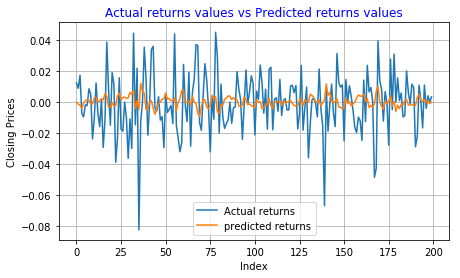

Test data:
([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1], 200)
Predicted data:
([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 

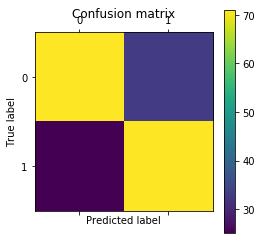

In [19]:
from arch.univariate import HARCH
netcareTrain1=returns[0:700]
netcareTest1=returns[700:900]
AR=ARX(netcareTrain1,lags=3)
AR.volatility=GARCH(1,0,1,power=1)
AR.distribution=StudentsT()
AR_AVGARCH=AR.fit(update_freq=0,disp='off')
print(AR_AVGARCH.summary())
# partion the data into training and testing data
netcareTrain1=np.array(netcareTrain1)
netcareTest1=np.array(netcareTest1)
#make predictions from retrieved estimated coefficients
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
            yhat += coef[i-1] * history[-i]
    return yhat
history=[x for x in netcareTrain1]
predictions = list()
for i in range(len(netcareTest1)):
    ar_coef= AR_AVGARCH.params["Close[1]"],AR_AVGARCH.params["Close[2]"],AR_AVGARCH.params["Close[3]"]#extract the generated parameters
    yhat=predict(ar_coef,history)
    predictions.append(yhat)
    obs=netcareTest1[i]
    history.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(netcareTest1,label="Actual returns")
plt.plot(predictions,label="predicted returns")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()
#direction of stock prices
#convert my predictions to binary 0 or 1
print("Test data:")
test_predicted=predictions
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
AR_AVGARCH_std700=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(netcareTest1)):
    if netcareTest1[t-1]>=netcareTest1[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
             count=count+1
    print ("The number of correct direction predictions is:",count,"out of:",len(x),"data points")
counter(binary_test,binary_predicted_test)
print("From a sample of",len(binary_test),"data points")
Confusion_matrix(len(binary_test))

# MODEL:AR(3)-EWMA- Student-t distribution

##### split: Train 500  Test:200

In [20]:
from arch.univariate import EWMAVariance
netcareTrain1=returns[0:500]
netcareTest1=returns[500:700]
#The AR model
AR=ARX(netcareTrain1,lags=3)
AR.volatility=EWMAVariance()
AR.distribution=StudentsT()
AR_EWMA=AR.fit(update_freq=0,disp='off')
print(AR_EWMA.summary())

                        AR - EWMA/RiskMetrics Model Results                         
Dep. Variable:                        Close   R-squared:                       0.010
Mean Model:                              AR   Adj. R-squared:                  0.004
Vol Model:                 EWMA/RiskMetrics   Log-Likelihood:                1391.06
Distribution:      Standardized Student's t   AIC:                          -2772.11
Method:                  Maximum Likelihood   BIC:                          -2751.07
                                              No. Observations:                  497
Date:                      Sat, Jul 14 2018   Df Residuals:                      492
Time:                              09:47:19   Df Model:                            5
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Cons

In [21]:
# partion the data into training and testing data
netcareTrain1=np.array(netcareTrain1)
netcareTest1=np.array(netcareTest1)
#normalised

#make predictions from retrieved estimated coefficients
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
            yhat += coef[i-1] * history[-i]
    return yhat
history=[x for x in netcareTrain1]
predictions = list()
for i in range(len(netcareTest1)):
    ar_coef= AR_EWMA.params["Close[1]"],AR_EWMA.params["Close[2]"],AR_EWMA.params["Close[3]"]#extract the generated parameters
    yhat=predict(ar_coef,history)
    predictions.append(yhat)
    obs=netcareTest1[i]
    history.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))


>predicted=0.006, expected=0.030
>predicted=-0.000, expected=0.000
>predicted=-0.000, expected=0.027
>predicted=-0.005, expected=-0.046
>predicted=0.004, expected=-0.002
>predicted=0.002, expected=0.031
>predicted=-0.002, expected=-0.010
>predicted=-0.001, expected=-0.005
>predicted=-0.000, expected=0.002
>predicted=0.001, expected=0.018
>predicted=-0.002, expected=-0.002
>predicted=-0.001, expected=-0.007
>predicted=0.000, expected=-0.005
>predicted=0.001, expected=0.008
>predicted=-0.000, expected=0.013
>predicted=-0.002, expected=0.001
>predicted=-0.001, expected=0.006
>predicted=-0.001, expected=0.007
>predicted=-0.001, expected=0.013
>predicted=-0.002, expected=0.004
>predicted=-0.002, expected=0.010
>predicted=-0.002, expected=-0.015
>predicted=0.001, expected=0.018
>predicted=-0.002, expected=0.018
>predicted=-0.003, expected=-0.015
>predicted=-0.000, expected=-0.008
>predicted=0.001, expected=0.005
>predicted=0.001, expected=0.007
>predicted=-0.001, expected=0.026
>predicted=-0

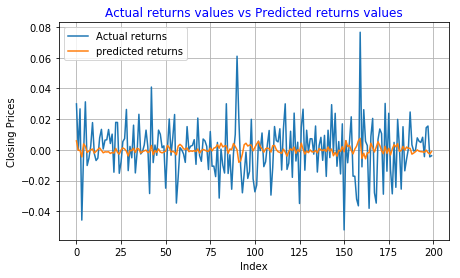

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(netcareTest1,label="Actual returns")
plt.plot(predictions,label="predicted returns")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()

In [23]:
#direction of stock prices
#convert my predictions to binary 0 or 1
print("Test data:")
test_predicted=predictions
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
AR_EWMA_std500=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(netcareTest1)):
    if netcareTest1[t-1]>=netcareTest1[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
             count=count+1
    print ("The number of correct direction predictions is:",count,"out of:",len(x),"data points")
counter(binary_test,binary_predicted_test)
print("From a sample of",len(binary_test),"data points")

Test data:
([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1], 200)
Predicted data:
([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 

77.5
[[75 19]
 [26 80]]


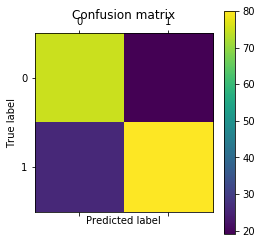

In [24]:
Confusion_matrix(len(binary_test))

##### split: Train 700  Test:200

                        AR - EWMA/RiskMetrics Model Results                         
Dep. Variable:                        Close   R-squared:                       0.022
Mean Model:                              AR   Adj. R-squared:                  0.018
Vol Model:                 EWMA/RiskMetrics   Log-Likelihood:                1922.88
Distribution:      Standardized Student's t   AIC:                          -3835.77
Method:                  Maximum Likelihood   BIC:                          -3813.03
                                              No. Observations:                  697
Date:                      Sat, Jul 14 2018   Df Residuals:                      692
Time:                              09:47:28   Df Model:                            5
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Cons

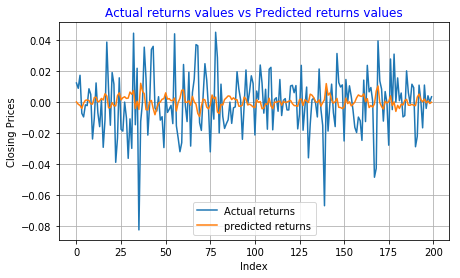

Test data:
([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1], 200)
Predicted data:
([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 

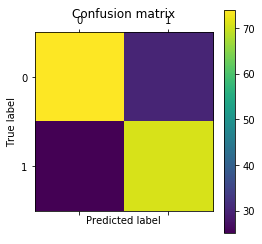

In [25]:
from arch.univariate import EWMAVariance
netcareTrain1=returns[0:700]
netcareTest1=returns[700:900]
#The AR model
AR=ARX(netcareTrain1,lags=3)
AR.volatility=EWMAVariance()
AR.distribution=StudentsT()
AR_EWMA=AR.fit(update_freq=0,disp='off')
print(AR_EWMA.summary())
# partion the data into training and testing data
netcareTrain1=np.array(netcareTrain1)#    normalised_log[0:781]#75% Training data
netcareTest1=np.array(netcareTest1)#    normalised_log[782:1040]# 2013-20170301
#normalised

#make predictions from retrieved estimated coefficients
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
            yhat += coef[i-1] * history[-i]
    return yhat
history=[x for x in netcareTrain1]
predictions = list()
for i in range(len(netcareTest1)):
    ar_coef= AR_EWMA.params["Close[1]"],AR_EWMA.params["Close[2]"],AR_EWMA.params["Close[3]"]#extract the generated parameters
    yhat=predict(ar_coef,history)
    predictions.append(yhat)
    obs=netcareTest1[i]
    history.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(netcareTest1,label="Actual returns")
plt.plot(predictions,label="predicted returns")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()
#direction of stock prices
#convert my predictions to binary 0 or 1
print("Test data:")
test_predicted=predictions
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
AR_EWMA_std700=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(netcareTest1)):
    if netcareTest1[t-1]>=netcareTest1[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
             count=count+1
    print ("The number of correct direction predictions is:",count,"out of:",len(x),"data points")
counter(binary_test,binary_predicted_test)
print("From a sample of",len(binary_test),"data points")
Confusion_matrix(len(binary_test))

# MODEL:AR(3)-EWMA normal distribution

##### split: Train 500  Test:200

                     AR - EWMA/RiskMetrics Model Results                      
Dep. Variable:                  Close   R-squared:                       0.011
Mean Model:                        AR   Adj. R-squared:                  0.005
Vol Model:           EWMA/RiskMetrics   Log-Likelihood:                1368.50
Distribution:                  Normal   AIC:                          -2728.99
Method:            Maximum Likelihood   BIC:                          -2712.16
                                        No. Observations:                  497
Date:                Sat, Jul 14 2018   Df Residuals:                      493
Time:                        09:47:33   Df Model:                            4
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const      1.6506e-03  9.016e-04      1.831  6.713e-02 

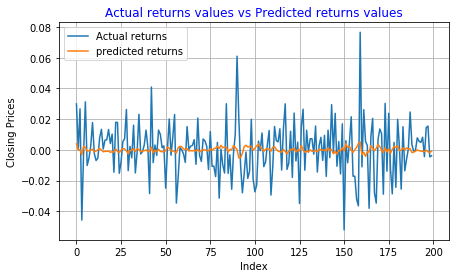

Test data:
([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1], 200)
Predicted data:
([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 

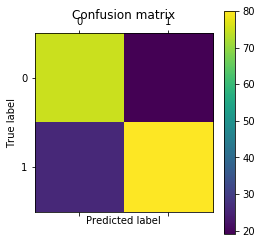

In [26]:
from arch.univariate import EWMAVariance
netcareTrain1=returns[0:500]
netcareTest1=returns[500:700]
#The AR model
AR=ARX(netcareTrain1,lags=3)
AR.volatility=EWMAVariance()
AR_EWMA=AR.fit(update_freq=0,disp='off')
print(AR_EWMA.summary())
# partion the data into training and testing data
netcareTrain1=np.array(netcareTrain1)
netcareTest1=np.array(netcareTest1)
#make predictions from retrieved estimated coefficients
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
            yhat += coef[i-1] * history[-i]
    return yhat
history=[x for x in netcareTrain1]
predictions = list()
for i in range(len(netcareTest1)):
    ar_coef= AR_EWMA.params["Close[1]"],AR_EWMA.params["Close[2]"],AR_EWMA.params["Close[3]"]#extract the generated parameters
    yhat=predict(ar_coef,history)
    predictions.append(yhat)
    obs=netcareTest1[i]
    history.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(netcareTest1,label="Actual returns")
plt.plot(predictions,label="predicted returns")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()
#direction of stock prices
#convert my predictions to binary 0 or 1
print("Test data:")
test_predicted=predictions
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
AR_EWMA_nd500=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(netcareTest1)):
    if netcareTest1[t-1]>=netcareTest1[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
             count=count+1
    print ("The number of correct direction predictions is:",count,"out of:",len(x),"data points")
counter(binary_test,binary_predicted_test)
print("From a sample of",len(binary_test),"data points")
Confusion_matrix(len(binary_test))

##### split: Train 700  Test:200

                     AR - EWMA/RiskMetrics Model Results                      
Dep. Variable:                  Close   R-squared:                       0.022
Mean Model:                        AR   Adj. R-squared:                  0.018
Vol Model:           EWMA/RiskMetrics   Log-Likelihood:                1894.98
Distribution:                  Normal   AIC:                          -3781.95
Method:            Maximum Likelihood   BIC:                          -3763.76
                                        No. Observations:                  697
Date:                Sat, Jul 14 2018   Df Residuals:                      693
Time:                        09:47:38   Df Model:                            4
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const      1.6070e-03  7.904e-04      2.033  4.202e-02 [5.

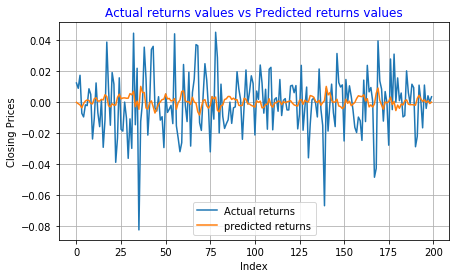

Test data:
([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1], 200)
Predicted data:
([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 

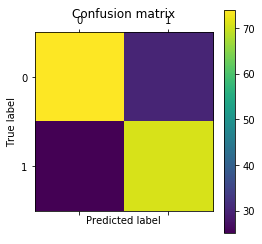

In [27]:
from arch.univariate import EWMAVariance
netcareTrain1=returns[0:700]
netcareTest1=returns[700:900]
#The AR model
AR=ARX(netcareTrain1,lags=3)
AR.volatility=EWMAVariance()
AR_EWMA=AR.fit(update_freq=0,disp='off')
print(AR_EWMA.summary())
# partion the data into training and testing data
netcareTrain1=np.array(netcareTrain1)
netcareTest1=np.array(netcareTest1)
#make predictions from retrieved estimated coefficients
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
            yhat += coef[i-1] * history[-i]
    return yhat
history=[x for x in netcareTrain1]
predictions = list()
for i in range(len(netcareTest1)):
    ar_coef= AR_EWMA.params["Close[1]"],AR_EWMA.params["Close[2]"],AR_EWMA.params["Close[3]"]#extract the generated parameters
    yhat=predict(ar_coef,history)
    predictions.append(yhat)
    obs=netcareTest1[i]
    history.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(netcareTest1,label="Actual returns")
plt.plot(predictions,label="predicted returns")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()
#direction of stock prices
#convert my predictions to binary 0 or 1
print("Test data:")
test_predicted=predictions
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
AR_EWMA_nd700=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(netcareTest1)):
    if netcareTest1[t-1]>=netcareTest1[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
             count=count+1
    print ("The number of correct direction predictions is:",count,"out of:",len(x),"data points")
counter(binary_test,binary_predicted_test)
print("From a sample of",len(binary_test),"data points")
Confusion_matrix(len(binary_test))

# MODEL: AR(3)-EGARCH-Student-t distribution 

##### split: Train 500  Test:200

                             AR - EGARCH Model Results                              
Dep. Variable:                            y   R-squared:                       0.022
Mean Model:                              AR   Adj. R-squared:                  0.018
Vol Model:                           EGARCH   Log-Likelihood:                1933.25
Distribution:      Standardized Student's t   AIC:                          -3848.51
Method:                  Maximum Likelihood   BIC:                          -3807.59
                                              No. Observations:                  697
Date:                      Sat, Jul 14 2018   Df Residuals:                      688
Time:                              09:47:43   Df Model:                            9
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Cons

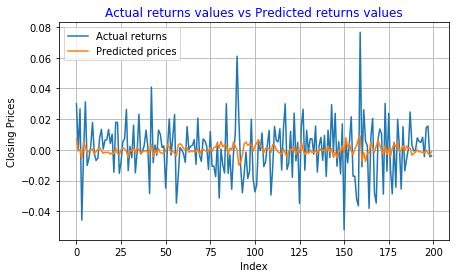

Test data:
([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1], 200)
Predicted data:
([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 

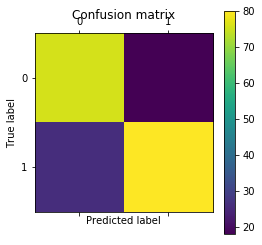

In [28]:
#fit the AR model
AR=ARX(netcareTrain1,lags=3)
resultsAR=AR.fit()

#fit the EGARCH(1,1) model
netcareTrain1=returns[0:500]
netcareTest1=returns[500:700]
from arch.univariate import EGARCH
AR.volatility=EGARCH(1,1)#specify the volatility of AR as the EGARCH model
#specify the distribution
AR.distribution = StudentsT()

AR_EGARCH=AR.fit(update_freq=0,disp='off',show_warning=False)
print(AR_EGARCH.summary())


#partion the data into training and testing data
netcareTrain1=np.array(netcareTrain1)
netcareTest1=np.array(netcareTest1)
#normalised
#Make predictions from retrieved estimated coefficients
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
            yhat += coef[i-1] * history[-i]
    return yhat
history=[x for x in netcareTrain1]
predictions = list()
for i in range(len(netcareTest1)):
    ar_coef=AR_EGARCH.params["y[1]"],AR_EGARCH.params["y[2]"],AR_EGARCH.params["y[3]"]#,AR_EGARCH.params["omega"],AR_EGARCH.params["alpha[1]"],AR_EGARCH.params["beta[1]"]#extract the generated parameters
    yhat=predict(ar_coef,history)
    predictions.append(yhat)
    obs=netcareTest1[i]
    history.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(netcareTest1,label="Actual returns")
plt.plot(predictions,label="Predicted prices")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()
#direction of stock prices
#convert my predictions to binary 0 or 1
print("Test data:")
test_predicted=predictions
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
AR_EGARCH_std500=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(netcareTest1)):
    if netcareTest1[t-1]>=netcareTest1[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
             count=count+1
    print ("The number of correct direction predictions is:",count,"out of:",len(x),"data points")
counter(binary_test,binary_predicted_test)
print("From a sample of",len(binary_test),"data points")
Confusion_matrix(len(binary_test))

##### split: Train 700  Test:200

                             AR - EGARCH Model Results                              
Dep. Variable:                            y   R-squared:                       0.010
Mean Model:                              AR   Adj. R-squared:                  0.004
Vol Model:                           EGARCH   Log-Likelihood:                1398.20
Distribution:      Standardized Student's t   AIC:                          -2778.40
Method:                  Maximum Likelihood   BIC:                          -2740.53
                                              No. Observations:                  497
Date:                      Sat, Jul 14 2018   Df Residuals:                      488
Time:                              09:47:46   Df Model:                            9
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Cons

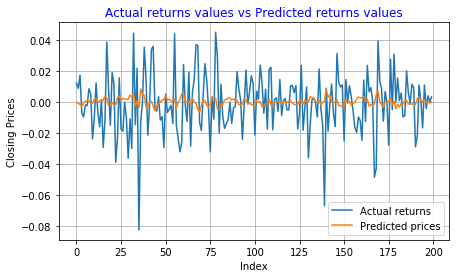

Test data:
([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1], 200)
Predicted data:
([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 

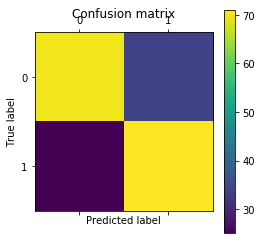

In [29]:
#fit the AR model
AR=ARX(netcareTrain1,lags=3)
resultsAR=AR.fit()

#fit the EGARCH(1,1) model
netcareTrain1=returns[0:700]
netcareTest1=returns[700:900]
from arch.univariate import EGARCH
AR.volatility=EGARCH(1,1)#specify the volatility of AR as the EGARCH model
#specify the distribution
AR.distribution = StudentsT()

AR_EGARCH=AR.fit(update_freq=0,disp='off',show_warning=False)
print(AR_EGARCH.summary())

#partion the data into training and testing data
netcareTrain1=np.array(netcareTrain1)
netcareTest1=np.array(netcareTest1)
#normalised
#Make predictions from retrieved estimated coefficients
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
            yhat += coef[i-1] * history[-i]
    return yhat
history=[x for x in netcareTrain1]
predictions = list()
for i in range(len(netcareTest1)):
    ar_coef=AR_EGARCH.params["y[1]"],AR_EGARCH.params["y[2]"],AR_EGARCH.params["y[3]"]#,AR_EGARCH.params["omega"],AR_EGARCH.params["alpha[1]"],AR_EGARCH.params["beta[1]"]#extract the generated parameters
    yhat=predict(ar_coef,history)
    predictions.append(yhat)
    obs=netcareTest1[i]
    history.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(netcareTest1,label="Actual returns")
plt.plot(predictions,label="Predicted prices")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()
#direction of stock prices
#convert my predictions to binary 0 or 1
print("Test data:")
test_predicted=predictions
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
AR_EGARCH_std700=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(netcareTest1)):
    if netcareTest1[t-1]>=netcareTest1[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
             count=count+1
    print ("The number of correct direction predictions is:",count,"out of:",len(x),"data points")
counter(binary_test,binary_predicted_test)
print("From a sample of",len(binary_test),"data points")
Confusion_matrix(len(binary_test))

# AR(3)-TARCH(1)-Student-t

##### split: Train 500  Test:200

                           AR - TARCH/ZARCH Model Results                           
Dep. Variable:                        Close   R-squared:                       0.010
Mean Model:                              AR   Adj. R-squared:                  0.004
Vol Model:                      TARCH/ZARCH   Log-Likelihood:                1397.92
Distribution:      Standardized Student's t   AIC:                          -2777.84
Method:                  Maximum Likelihood   BIC:                          -2739.96
                                              No. Observations:                  497
Date:                      Sat, Jul 14 2018   Df Residuals:                      488
Time:                              09:47:51   Df Model:                            9
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
-----------------------------------------------------------------------------

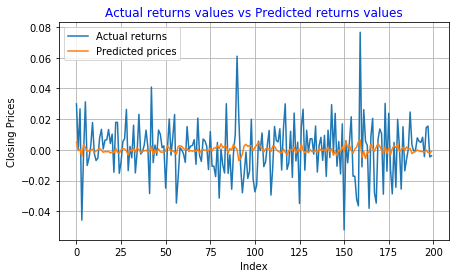

Test data:
([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1], 200)
Predicted data:
([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 

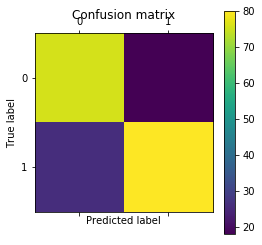

In [30]:
netcareTrain1=returns[0:500]
netcareTest1=returns[500:700]
AR=ARX(netcareTrain1,lags=3)
AR.volatility=GARCH(1,1,1,power=1)
AR.distribution=StudentsT()
AR_TARCH=AR.fit(update_freq=0,disp='off')
print(AR_TARCH.summary())
#partion the data into training and testing data
netcareTrain1=np.array(netcareTrain1)
netcareTest1=np.array(netcareTest1)
#make predictions from retrieved estimated coefficients
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
            yhat += coef[i-1] * history[-i]
    return yhat
history=[x for x in netcareTrain1]
predictions = list()
for i in range(len(netcareTest1)):
    ar_coef= AR_TARCH.params["Close[1]"],AR_TARCH.params["Close[2]"],AR_TARCH.params["Close[3]"]#extract the generated parameters
    yhat=predict(ar_coef,history)
    predictions.append(yhat)
    obs=netcareTest1[i]
    history.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(netcareTest1,label="Actual returns")
plt.plot(predictions,label="Predicted prices")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()   
#direction of stock prices
#convert my predictions to binary 0 or 1
print("Test data:")
test_predicted=predictions
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
AR_TARCH_std500=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(netcareTest1)):
    if netcareTest1[t-1]>=netcareTest1[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
             count=count+1
    print ("The number of correct direction predictions is:",count,"out of:",len(x),"data points")
counter(binary_test,binary_predicted_test)
print("From a sample of",len(binary_test),"data points")
Confusion_matrix(len(binary_test))

##### split: Train 700  Test:200

                           AR - TARCH/ZARCH Model Results                           
Dep. Variable:                        Close   R-squared:                       0.022
Mean Model:                              AR   Adj. R-squared:                  0.018
Vol Model:                      TARCH/ZARCH   Log-Likelihood:                1933.10
Distribution:      Standardized Student's t   AIC:                          -3848.19
Method:                  Maximum Likelihood   BIC:                          -3807.27
                                              No. Observations:                  697
Date:                      Sat, Jul 14 2018   Df Residuals:                      688
Time:                              09:47:56   Df Model:                            9
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Cons

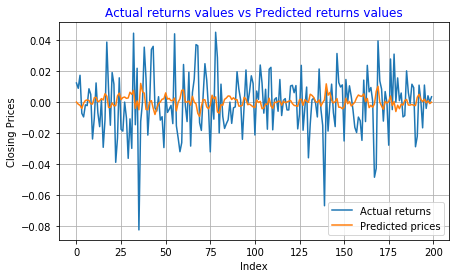

Test data:
([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1], 200)
Predicted data:
([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 

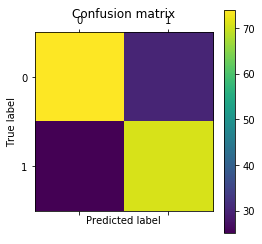

In [31]:
netcareTrain1=returns[0:700]
netcareTest1=returns[700:900]
AR=ARX(netcareTrain1,lags=3)
AR.volatility=GARCH(1,1,1,power=1)
AR.distribution=StudentsT()
AR_TARCH=AR.fit(update_freq=0,disp='off')
print(AR_TARCH.summary())
#partion the data into training and testing data
netcareTrain1=np.array(netcareTrain1)
netcareTest1=np.array(netcareTest1)
#make predictions from retrieved estimated coefficients
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
            yhat += coef[i-1] * history[-i]
    return yhat
history=[x for x in netcareTrain1]
predictions = list()
for i in range(len(netcareTest1)):
    ar_coef= AR_TARCH.params["Close[1]"],AR_TARCH.params["Close[2]"],AR_TARCH.params["Close[3]"]#extract the generated parameters
    yhat=predict(ar_coef,history)
    predictions.append(yhat)
    obs=netcareTest1[i]
    history.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(netcareTest1,label="Actual returns")
plt.plot(predictions,label="Predicted prices")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()   
#direction of stock prices
#convert my predictions to binary 0 or 1
print("Test data:")
test_predicted=predictions
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
AR_TARCH_std700=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(netcareTest1)):
    if netcareTest1[t-1]>=netcareTest1[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
             count=count+1
    print ("The number of correct direction predictions is:",count,"out of:",len(x),"data points")
counter(binary_test,binary_predicted_test)
print("From a sample of",len(binary_test),"data points")
Confusion_matrix(len(binary_test))

##  MODEL AR(3)-TARCH normal distribution

##### split: Train 500  Test:200

                        AR - TARCH/ZARCH Model Results                        
Dep. Variable:                  Close   R-squared:                       0.010
Mean Model:                        AR   Adj. R-squared:                  0.004
Vol Model:                TARCH/ZARCH   Log-Likelihood:                1381.49
Distribution:                  Normal   AIC:                          -2746.98
Method:            Maximum Likelihood   BIC:                          -2713.31
                                        No. Observations:                  497
Date:                Sat, Jul 14 2018   Df Residuals:                      489
Time:                        09:48:00   Df Model:                            8
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const      1.7026e-03  3.512e-04      4.848  1.247e-

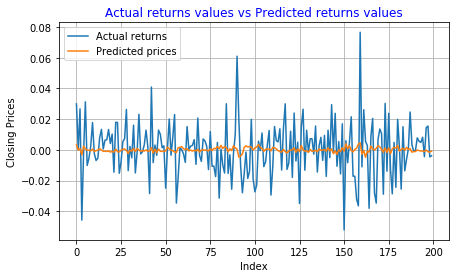

Test data:
([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1], 200)
Predicted data:
([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 

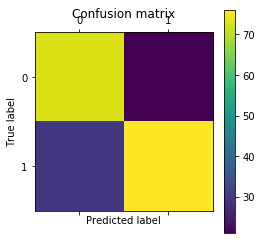

In [32]:
netcareTrain1=returns[0:500]
netcareTest1=returns[500:700]
AR=ARX(netcareTrain1,lags=3)
AR.volatility=GARCH(1,1,1,power=1)
AR_TARCH=AR.fit(update_freq=0,disp='off')
print(AR_TARCH.summary())
#partion the data into training and testing data
netcareTrain1=np.array(netcareTrain1)
netcareTest1=np.array(netcareTest1)
#make predictions from retrieved estimated coefficients
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
            yhat += coef[i-1] * history[-i]
    return yhat
history=[x for x in netcareTrain1]
predictions = list()
for i in range(len(netcareTest1)):
    ar_coef= AR_TARCH.params["Close[1]"],AR_TARCH.params["Close[2]"],AR_TARCH.params["Close[3]"]#extract the generated parameters
    yhat=predict(ar_coef,history)
    predictions.append(yhat)
    obs=netcareTest1[i]
    history.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(netcareTest1,label="Actual returns")
plt.plot(predictions,label="Predicted prices")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()   
#direction of stock prices
#convert my predictions to binary 0 or 1
print("Test data:")
test_predicted=predictions
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
AR_TARCH_nd500=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(netcareTest1)):
    if netcareTest1[t-1]>=netcareTest1[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
             count=count+1
    print ("The number of correct direction predictions is:",count,"out of:",len(x),"data points")
counter(binary_test,binary_predicted_test)
print("From a sample of",len(binary_test),"data points")
Confusion_matrix(len(binary_test))

##### split: Train 700  Test:200

                        AR - TARCH/ZARCH Model Results                        
Dep. Variable:                  Close   R-squared:                       0.023
Mean Model:                        AR   Adj. R-squared:                  0.018
Vol Model:                TARCH/ZARCH   Log-Likelihood:                1916.24
Distribution:                  Normal   AIC:                          -3816.48
Method:            Maximum Likelihood   BIC:                          -3780.10
                                        No. Observations:                  697
Date:                Sat, Jul 14 2018   Df Residuals:                      689
Time:                        09:48:03   Df Model:                            8
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const      1.5405e-03  5.042e-04      3.055  2.249e-03 [5.

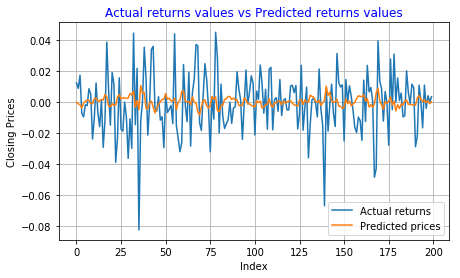

Test data:
([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1], 200)
Predicted data:
([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 

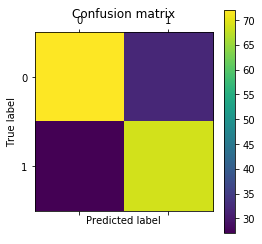

In [33]:
netcareTrain1=returns[0:700]
netcareTest1=returns[700:900]
AR=ARX(netcareTrain1,lags=3)
AR.volatility=GARCH(1,1,1,power=1)
AR_TARCH=AR.fit(update_freq=0,disp='off')
print(AR_TARCH.summary())
#partion the data into training and testing data
netcareTrain1=np.array(netcareTrain1)
netcareTest1=np.array(netcareTest1)
#make predictions from retrieved estimated coefficients
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
            yhat += coef[i-1] * history[-i]
    return yhat
history=[x for x in netcareTrain1]
predictions = list()
for i in range(len(netcareTest1)):
    ar_coef= AR_TARCH.params["Close[1]"],AR_TARCH.params["Close[2]"],AR_TARCH.params["Close[3]"]#extract the generated parameters
    yhat=predict(ar_coef,history)
    predictions.append(yhat)
    obs=netcareTest1[i]
    history.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(netcareTest1,label="Actual returns")
plt.plot(predictions,label="Predicted prices")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()   
#direction of stock prices
#convert my predictions to binary 0 or 1
print("Test data:")
test_predicted=predictions
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
AR_TARCH_nd700=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(netcareTest1)):
    if netcareTest1[t-1]>=netcareTest1[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
             count=count+1
    print ("The number of correct direction predictions is:",count,"out of:",len(x),"data points")
counter(binary_test,binary_predicted_test)
print("From a sample of",len(binary_test),"data points")
Confusion_matrix(len(binary_test))

# Accuracy for AR(3)-GARCH type models using: 
# Train:500 Test:200, Train:700 Test:200

In [34]:
import pandas as pd    
steps=[[76.5,73.0],[74.5,70.5],[78.0,75.0],[77.5,72.5],[77.5,72.5],[77.5,70.5],[78,72.5],[74.5,70.5]]         

In [35]:
data=pd.DataFrame(steps,index=['AR(3)-GARCH_nd','AR(3)-AVGARCH_nd','AR(3)-AVGARCH_std','AR(3)-EWMA_std','AR(3)-EWMA_nd','AR(3)-EGARCH_std','AR(3)-TARCH_std','AR(3)-TARCH_nd'],columns=["Train:500 Test:200","Train:700 Test:200"])

In [36]:
print("The results below shows that the AR(3)-GARCH type models gives better result when\
 trained by small smaple size of 500")
print 'Accuracy(percentage):'
data

The results below shows that the AR(3)-GARCH type models gives better result when trained by small smaple size of 500
Accuracy(percentage):


,Train:500 Test:200,Train:700 Test:200
AR(3)-GARCH_nd,76.5,73.0
AR(3)-AVGARCH_nd,74.5,70.5
AR(3)-AVGARCH_std,78.0,75.0
AR(3)-EWMA_std,77.5,72.5
AR(3)-EWMA_nd,77.5,72.5
AR(3)-EGARCH_std,77.5,70.5
AR(3)-TARCH_std,78.0,72.5
AR(3)-TARCH_nd,74.5,70.5


# Train:500 Test:200

Summary results of AR(3)-GARCH type models Train:500 Test:200


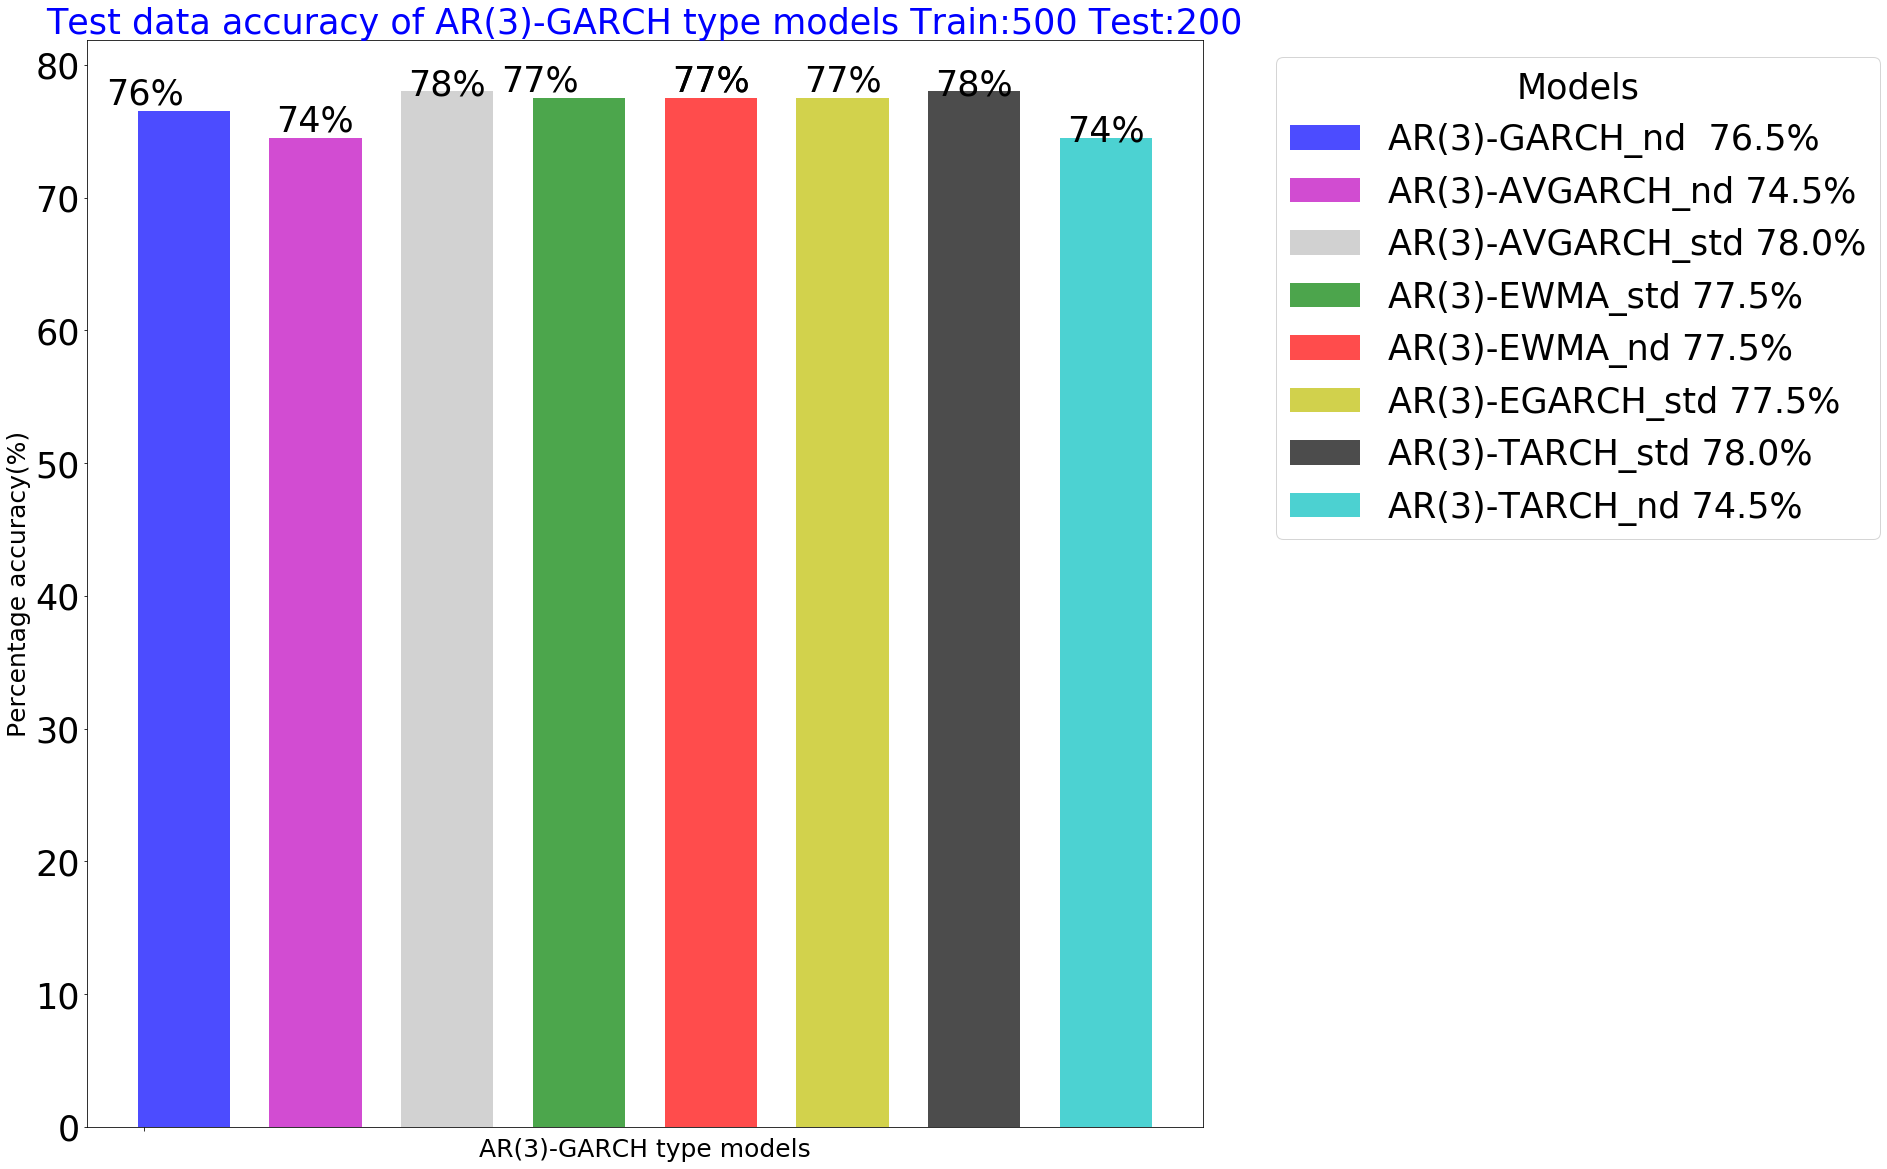

In [38]:
import matplotlib.pylab as plt
import numpy as np

# data to plot
n_groups = 1

ARGARCH_nd=(76.5)
ARAVGARCH_nd=(74.5)
ARAVGARCH_std=(78.0)
AREWMA_std = (77.5)
AREWMA_nd=(77.5)
AREGARCH_std=(77.5)
ARTARCH_std=(78.0)
ARTARCH_nd=(74.5)


# Create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.07
opacity =0.7

rects1 = plt.bar(0.1, ARGARCH_nd, bar_width,
                 alpha=opacity,
                 color='b',
                 label='AR(3)-GARCH_nd  76.5%')
 
rects2 = plt.bar(0.2, ARAVGARCH_nd, bar_width,
                 alpha=opacity,
                 color='m',
                 label='AR(3)-AVGARCH_nd 74.5%')

rects3 = plt.bar(0.3, ARAVGARCH_std, bar_width,
                 alpha=opacity,
                 color="0.75",
                 label='AR(3)-AVGARCH_std 78.0%')
rects4 = plt.bar(0.4, AREWMA_std, bar_width,
                 alpha=opacity,
                 color='g',
                 label='AR(3)-EWMA_std 77.5%')


rects5 = plt.bar(0.5, AREWMA_nd, bar_width,
                 alpha=opacity,
                 color='r',
                 label='AR(3)-EWMA_nd 77.5%')
 
rects6 = plt.bar(0.6, AREGARCH_std, bar_width,
                 alpha=opacity,
                 color='y',
                 label='AR(3)-EGARCH_std 77.5%')

rects7 = plt.bar(0.7, ARTARCH_std, bar_width,
                 alpha=opacity,
                 color="k",
                 label='AR(3)-TARCH_std 78.0%')
rects8= plt.bar(0.8, ARTARCH_nd, bar_width,
                 alpha=opacity,
                 color='c',
                 label='AR(3)-TARCH_nd 74.5%')





rects=[rects1,rects2,rects3,rects4,rects5,rects6,rects7,rects8]
#Display the accuray as percentage
for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1*height,
            '%d' % int(height) + "%", ha='right', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1*height,
            '%d' % int(height) + "%", ha='center', va='bottom')
for rect in rects5:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
            '%d' % int(height) + "%", ha='center', va='bottom')

for rect in rects3:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')
#Display the accuray as percentage
for rect in rects4:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1*height,
            '%d' % int(height) + "%", ha='right', va='bottom')

for rect in rects5:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1*height,
            '%d' % int(height) + "%", ha='center', va='bottom')
for rect in rects6:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
            '%d' % int(height) + "%", ha='center', va='bottom')

for rect in rects7:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')

for rect in rects8:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')

    
#Size of the graph
print("Summary results of AR(3)-GARCH type models Train:500 Test:200")
import matplotlib.pylab as plt
from pylab import rcParams
plt.rcParams['figure.figsize'] = 20,20   
plt.rc('font', size=35)  
plt.rc('axes', labelsize=35)
plt.xlabel('AR(3)-GARCH type models',fontsize= 25)
plt.ylabel('Percentage accuracy(%)',fontsize= 25)
plt.title('Test data accuracy of AR(3)-GARCH type models Train:500 Test:200',color="blue",fontsize= 35)
plt.xticks(index + bar_width, ('', ''))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5,fontsize= 35,title="Models") 
#plt.tight_layout()
plt.show()
    

In [39]:
#MSE loss
netcareTrain1=returns[0:500]
netcareTest1=returns[500:700]
netcareTrain1=np.array(netcareTrain1)
netcareTest1=np.array(netcareTest1)
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(netcareTest1)):
    if netcareTest1[t-1]>=netcareTest1[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
#print(binary_test,len(binary_test))
binary_test=np.array(binary_test)
AR_GARCH_nd500_losses=(AR_GARCH_nd500-binary_test)**2
AR_AVGARCH_nd500_losses=(AR_AVGARCH_nd500-binary_test)**2
AR_AVGARCH_std500_losses=(AR_AVGARCH_std500-binary_test)**2
AR_EWMA_std500_losses=(AR_EWMA_std500-binary_test)**2
AR_EWMA_nd500_losses=(AR_EWMA_nd500-binary_test)**2
AR_EGARCH_std500_losses=(AR_EGARCH_std500-binary_test)**2
AR_TARCH_std500_losses=(AR_TARCH_std500-binary_test)**2
AR_TARCH_nd500_losses=(AR_TARCH_nd500-binary_test)**2

model_losses=AR_GARCH_nd500_losses,AR_AVGARCH_nd500_losses,AR_AVGARCH_std500_losses,AR_EWMA_std500_losses,AR_EWMA_nd500_losses,AR_EGARCH_std500_losses,AR_TARCH_std500_losses,AR_TARCH_nd500_losses              
model_losses=np.array(model_losses).T
model_losses=pd.DataFrame(model_losses,columns=["AR_GARCH_nd","AR_AVGARCH_nd","AR_AVGARCH_std","AR_EWMA_std","AR_EWMA_nd","AR_EGARCH_std","AR_TARCH_std","AR_TARCH_nd"])                                   
model_losses.mean(0)

AR_GARCH_nd       0.235
AR_AVGARCH_nd     0.255
AR_AVGARCH_std    0.220
AR_EWMA_std       0.225
AR_EWMA_nd        0.225
AR_EGARCH_std     0.220
AR_TARCH_std      0.220
AR_TARCH_nd       0.255
dtype: float64

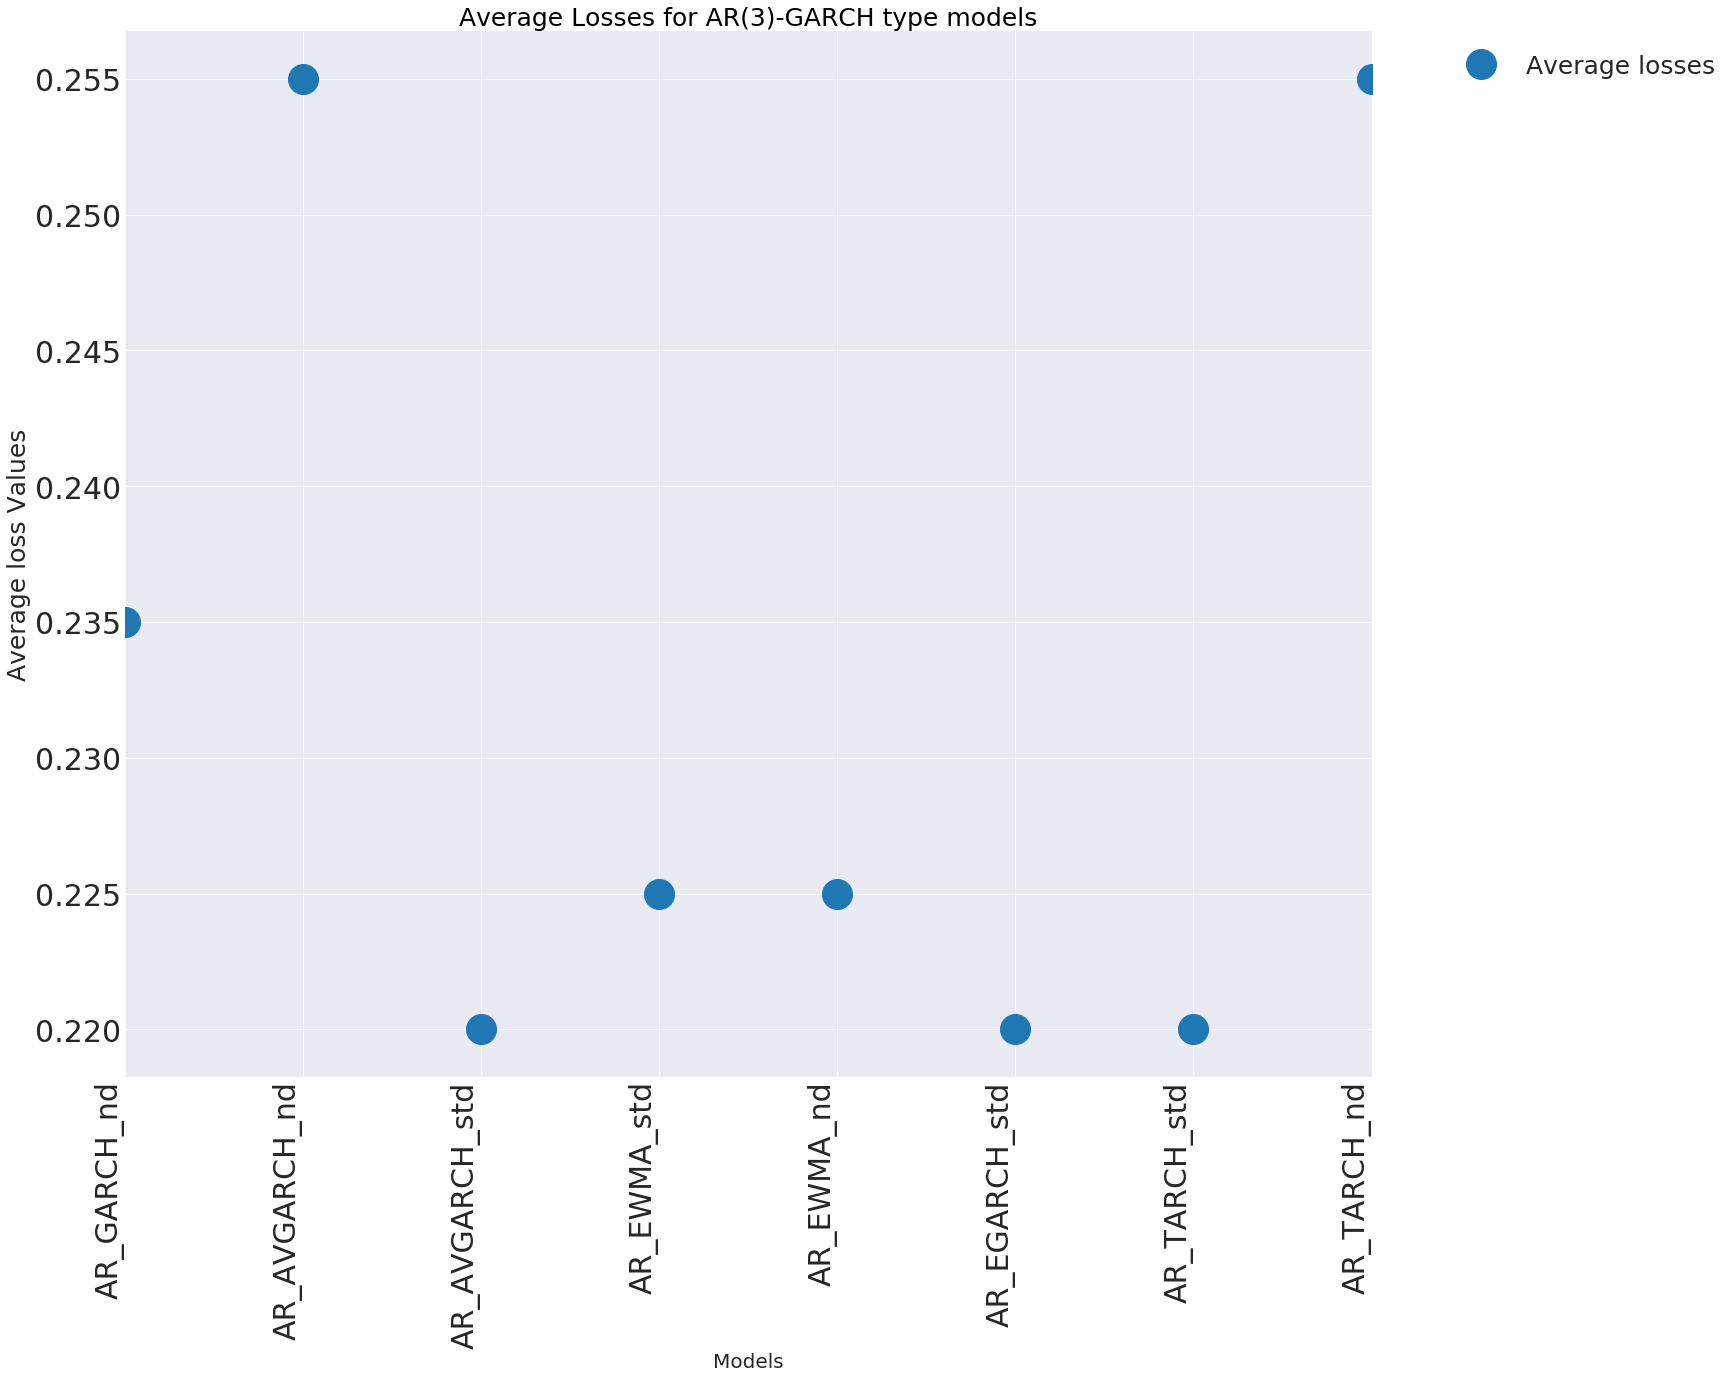

In [40]:
import seaborn as sns
sns.set_style("darkgrid")
#plt.rcParams['axes.facecolor'] = 'green'
mean=model_losses.mean(0)
mean.plot(style="o",markersize=30,fontsize= 30)
plt.rcParams['figure.figsize'] = (13, 10)
#plt.rcParams['axes.facecolor'] = '0.75'
plt.ylabel("Average loss Values",fontsize= 25)
plt.xlabel("Models", fontsize=20)
plt.xticks(rotation=90, ha="right")
plt.legend(["Average losses"],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5,fontsize= 25) 
plt.title("Average Losses for AR(3)-GARCH type models",color='black',fontsize= 25)
plt.tight_layout()
plt.show()

In [41]:
model_losses=AR_GARCH_nd500_losses,AR_AVGARCH_nd500_losses,AR_EWMA_std500_losses,AR_EWMA_nd500_losses,AR_EGARCH_std500_losses,AR_TARCH_std500_losses,AR_TARCH_nd500_losses              
model_losses=np.array(model_losses).T
model_losses=pd.DataFrame(model_losses,columns=["AR_GARCH_nd","AR_AVGARCH_nd","AR_EWMA_std","AR_EWMA_nd","AR_EGARCH_std","AR_TARCH_std","AR_TARCH_nd"])                                   
model_losses.mean(0)

print("The P-values are large, it is the indication of that we fail to  reject the null hypothesis\
. This implies that no model is better than the bench mark AR(3)-AVGARCH model.\
A high p-value tells you that  the sample being analyzed does not\
yield strong evidence that the benchmark is outperformed.")
bench_mark=np.array([AR_AVGARCH_std500_losses]).T
from arch.bootstrap import SPA
spa=SPA(bench_mark,model_losses)
spa.seed(123)
spa.compute()
print(spa.pvalues)
print("The number the left (right) of the SPA-Consistent p-value,\
is a lower (upper) bound for the true p-value")

The P-values are large, it is the indication of that we fail to  reject the null hypothesis. This implies that no model is better than the bench mark AR(3)-AVGARCH model.A high p-value tells you that  the sample being analyzed does notyield strong evidence that the benchmark is outperformed.
lower         0.326
consistent    0.730
upper         0.793
dtype: float64
The number the left (right) of the SPA-Consistent p-value,is a lower (upper) bound for the true p-value


# Train:700 Test:200

Summary results of AR(3)-GARCH type models Train:700 Test:200


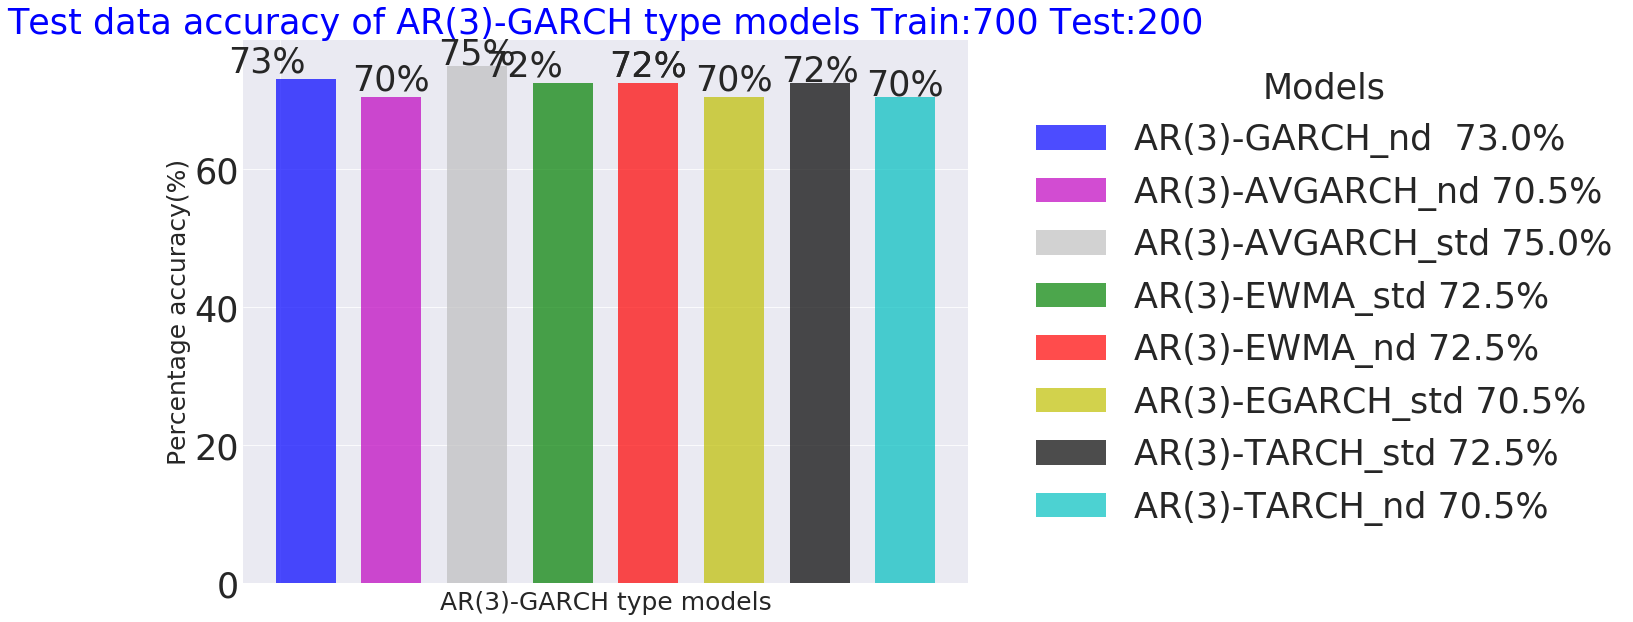

In [42]:
import matplotlib.pylab as plt
import numpy as np

# data to plot
n_groups = 1

ARGARCH_nd=(73.0)
ARAVGARCH_nd=(70.5)
ARAVGARCH_std=(75.0)
AREWMA_std = (72.5)
AREWMA_nd=(72.5)
AREGARCH_std=(70.5)
ARTARCH_std=(72.5)
ARTARCH_nd=(70.5)


# Create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.07
opacity =0.7

rects1 = plt.bar(0.1, ARGARCH_nd, bar_width,
                 alpha=opacity,
                 color='b',
                 label='AR(3)-GARCH_nd  73.0%')
 
rects2 = plt.bar(0.2, ARAVGARCH_nd, bar_width,
                 alpha=opacity,
                 color='m',
                 label='AR(3)-AVGARCH_nd 70.5%')

rects3 = plt.bar(0.3, ARAVGARCH_std, bar_width,
                 alpha=opacity,
                 color="0.75",
                 label='AR(3)-AVGARCH_std 75.0%')
rects4 = plt.bar(0.4, AREWMA_std, bar_width,
                 alpha=opacity,
                 color='g',
                 label='AR(3)-EWMA_std 72.5%')


rects5 = plt.bar(0.5, AREWMA_nd, bar_width,
                 alpha=opacity,
                 color='r',
                 label='AR(3)-EWMA_nd 72.5%')
 
rects6 = plt.bar(0.6, AREGARCH_std, bar_width,
                 alpha=opacity,
                 color='y',
                 label='AR(3)-EGARCH_std 70.5%')

rects7 = plt.bar(0.7, ARTARCH_std, bar_width,
                 alpha=opacity,
                 color="k",
                 label='AR(3)-TARCH_std 72.5%')
rects8= plt.bar(0.8, ARTARCH_nd, bar_width,
                 alpha=opacity,
                 color='c',
                 label='AR(3)-TARCH_nd 70.5%')





rects=[rects1,rects2,rects3,rects4,rects5,rects6,rects7,rects8]
#Display the accuray as percentage
for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1*height,
            '%d' % int(height) + "%", ha='right', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1*height,
            '%d' % int(height) + "%", ha='center', va='bottom')
for rect in rects5:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
            '%d' % int(height) + "%", ha='center', va='bottom')

for rect in rects3:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')
#Display the accuray as percentage
for rect in rects4:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1*height,
            '%d' % int(height) + "%", ha='right', va='bottom')

for rect in rects5:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1*height,
            '%d' % int(height) + "%", ha='center', va='bottom')
for rect in rects6:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
            '%d' % int(height) + "%", ha='center', va='bottom')

for rect in rects7:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')

for rect in rects8:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')

    
#Size of the graph
print("Summary results of AR(3)-GARCH type models Train:700 Test:200")
import matplotlib.pylab as plt
from pylab import rcParams
plt.rcParams['figure.figsize'] = 20,20   
plt.rc('font', size=35)  
plt.rc('axes', labelsize=35)
plt.xlabel('AR(3)-GARCH type models',fontsize= 25)
plt.ylabel('Percentage accuracy(%)',fontsize= 25)
plt.title('Test data accuracy of AR(3)-GARCH type models Train:700 Test:200',color="blue",fontsize= 35)
plt.xticks(index + bar_width, ('', ''))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5,fontsize= 35,title="Models") 
#plt.tight_layout()
plt.show()
    

In [43]:
#MSE loss
netcareTrain1=returns[0:700]
netcareTest1=returns[700:900]
netcareTrain1=np.array(netcareTrain1)
netcareTest1=np.array(netcareTest1)
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(netcareTest1)):
    if netcareTest1[t-1]>=netcareTest1[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
#print(binary_test,len(binary_test))
binary_test=np.array(binary_test)
AR_GARCH_nd700_losses=(AR_GARCH_nd700-binary_test)**2
AR_AVGARCH_nd700_losses=(AR_AVGARCH_nd700-binary_test)**2
AR_AVGARCH_std700_losses=(AR_AVGARCH_std700-binary_test)**2
AR_EWMA_std700_losses=(AR_EWMA_std700-binary_test)**2
AR_EWMA_nd700_losses=(AR_EWMA_nd700-binary_test)**2
AR_EGARCH_std700_losses=(AR_EGARCH_std700-binary_test)**2
AR_TARCH_std700_losses=(AR_TARCH_std700-binary_test)**2
AR_TARCH_nd700_losses=(AR_TARCH_nd700-binary_test)**2

model_losses1=AR_GARCH_nd700_losses,AR_AVGARCH_nd700_losses,AR_AVGARCH_std700_losses,AR_EWMA_std700_losses,AR_EWMA_nd700_losses,AR_EGARCH_std700_losses,AR_TARCH_std700_losses,AR_TARCH_nd700_losses              
model_losses1=np.array(model_losses1).T
model_losses1=pd.DataFrame(model_losses1,columns=["AR_GARCH_nd","AR_AVGARCH_nd","AR_AVGARCH_std","AR_EWMA_std","AR_EWMA_nd","AR_EGARCH_std","AR_TARCH_std","AR_TARCH_nd"])                                   
model_losses1.mean(0)

AR_GARCH_nd       0.265
AR_AVGARCH_nd     0.295
AR_AVGARCH_std    0.290
AR_EWMA_std       0.275
AR_EWMA_nd        0.275
AR_EGARCH_std     0.295
AR_TARCH_std      0.275
AR_TARCH_nd       0.295
dtype: float64

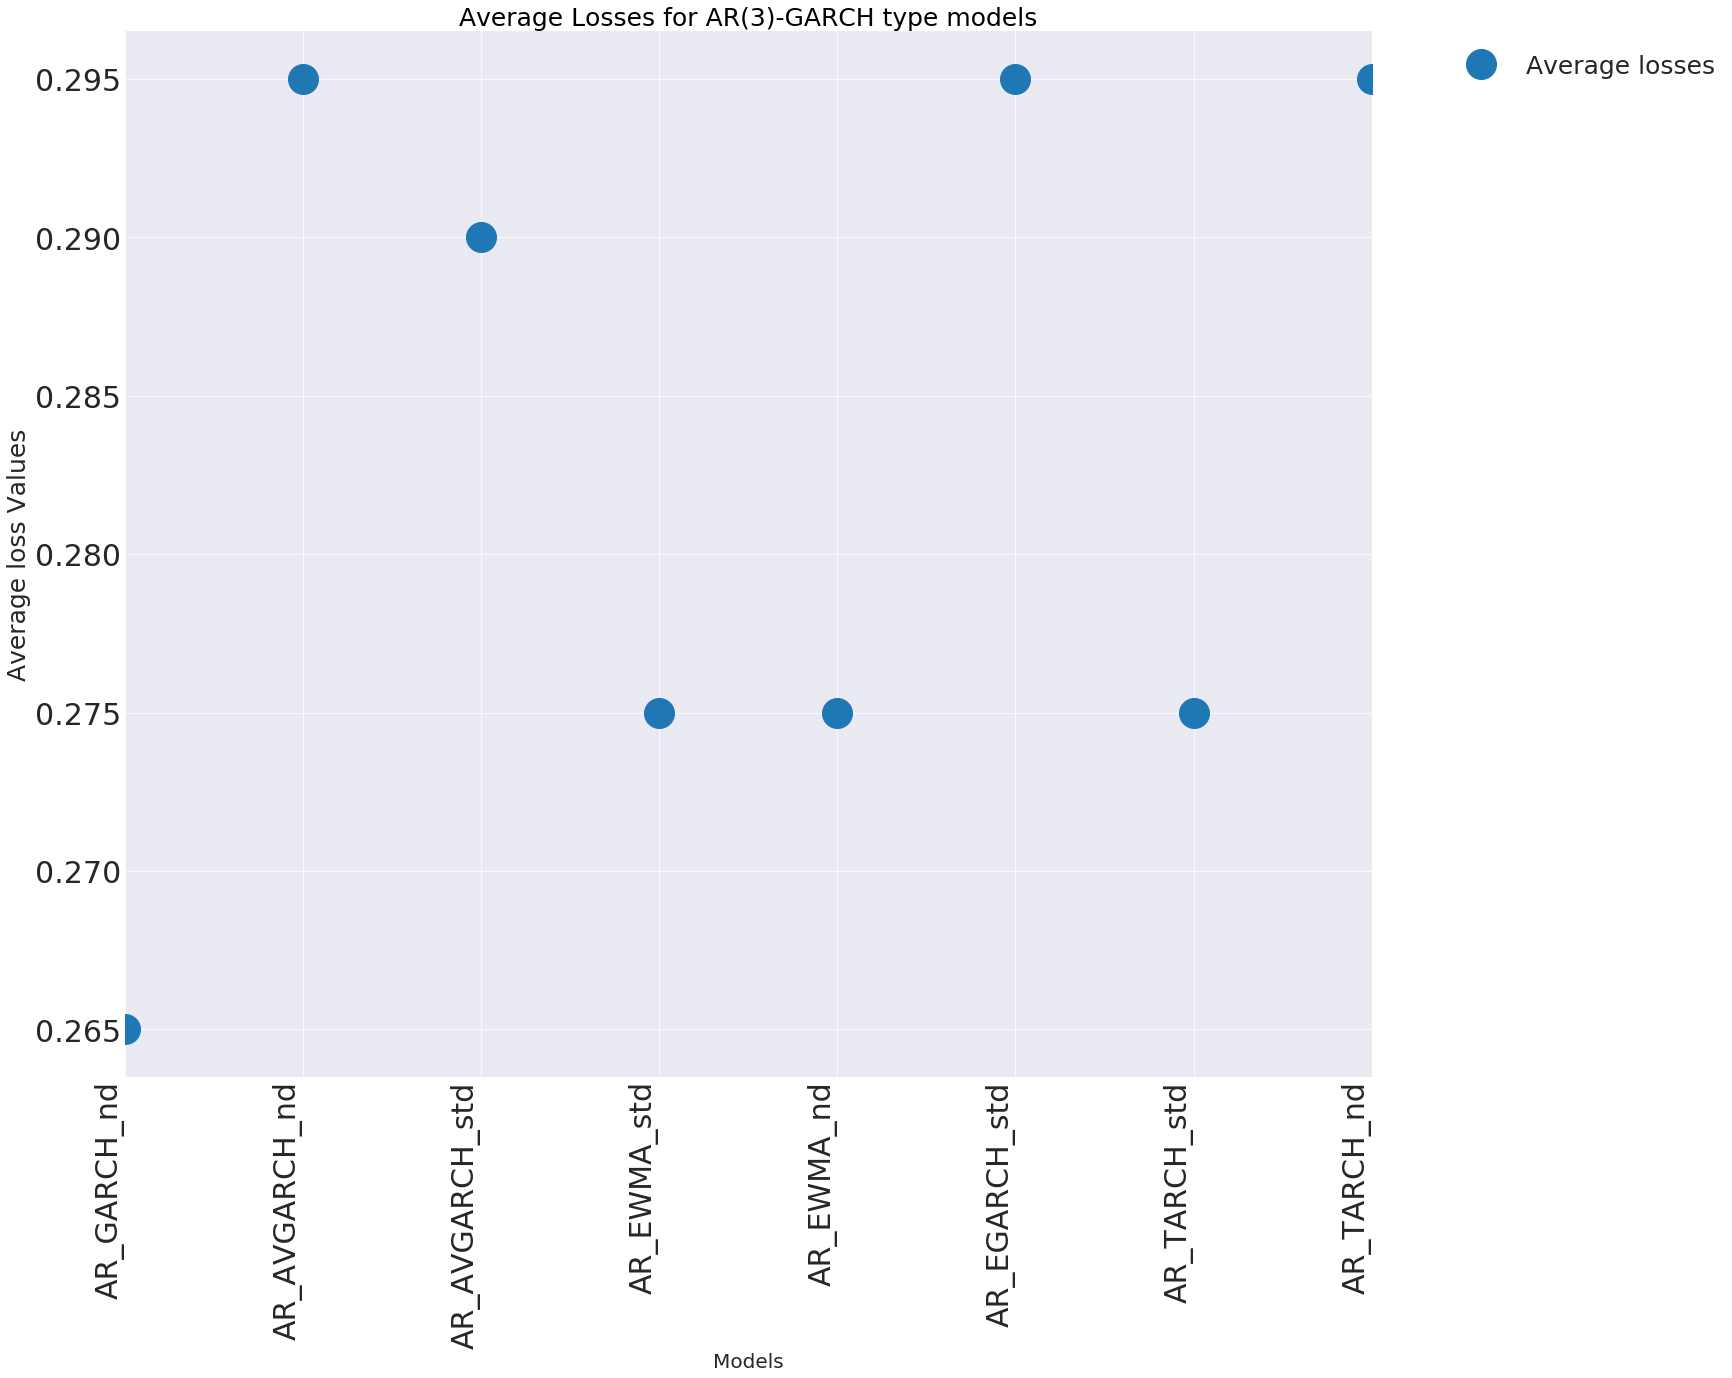

In [44]:
import seaborn as sns
sns.set_style("darkgrid")
#plt.rcParams['axes.facecolor'] = 'green'
mean=model_losses1.mean(0)
mean.plot(style="o",markersize=30,fontsize= 30)
plt.rcParams['figure.figsize'] = (13, 10)
#plt.rcParams['axes.facecolor'] = '0.75'
plt.ylabel("Average loss Values",fontsize= 25)
plt.xlabel("Models", fontsize=20)
plt.xticks(rotation=90, ha="right")
plt.legend(["Average losses"],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5,fontsize= 25) 
plt.title("Average Losses for AR(3)-GARCH type models",color='black',fontsize= 25)
plt.tight_layout()
plt.show()

In [46]:
model_losses1=AR_AVGARCH_std700_losses,AR_AVGARCH_nd700_losses,AR_EWMA_std700_losses,AR_EWMA_nd700_losses,AR_EGARCH_std700_losses,AR_TARCH_std700_losses,AR_TARCH_nd700_losses              
model_losses1=np.array(model_losses1).T
model_losses1=pd.DataFrame(model_losses1,columns=["AR_AVGARCH_std","AR_AVGARCH_nd","AR_EWMA_std","AR_EWMA_nd","AR_EGARCH_std","AR_TARCH_std","AR_TARCH_nd"])                                   
model_losses1.mean(0)
print("The P-values are large, it is the indication of that we fail to  reject the null hypothesis\
. This implies that no model is better than the bench mark AR(3)-AVGARCH model.\
A high p-value tells you that  the sample being analyzed does not\
yield strong evidence that the benchmark is outperformed.")
bench_mark=np.array([AR_GARCH_nd700_losses]).T
from arch.bootstrap import SPA
spa=SPA(bench_mark,model_losses1)
spa.seed(123)
spa.compute()
print(spa.pvalues)
print("The number the left (right) of the SPA-Consistent p-value,\
is a lower (upper) bound for the true p-value")

The P-values are large, it is the indication of that we fail to  reject the null hypothesis. This implies that no model is better than the bench mark AR(3)-AVGARCH model.A high p-value tells you that  the sample being analyzed does notyield strong evidence that the benchmark is outperformed.
lower         0.600
consistent    0.923
upper         0.991
dtype: float64
The number the left (right) of the SPA-Consistent p-value,is a lower (upper) bound for the true p-value
